In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
file =open('Small_files/logaa','r', errors='ignore')
file2 =open('replaced','w+')
contents=file.read()
for x in range(len(contents)):
    if contents[x] == ",":
        file2.write("!!@@@")
    else:
        file2.write(str(contents[x]))
file2.close()


In [3]:
names=["Month" ,"Day" ,"Time" , "Machine", "Application"]
df= pd.read_csv('replaced', sep=" " , usecols=range(5) ,names=names)

In [4]:
df["Application"] = df["Application"].replace({':':''}, regex=True)

In [5]:
lines=contents.split("\n")
wanted_lines=""
for index,line in enumerate(lines):
    columns=line.split(": ")
    columns[:-1]
    list_1=columns[1:]
    wanted= "!-!".join(list_1)
    wanted = ": ".join([columns[0],wanted])
    if index !=len(lines)-1:
        wanted_lines+=wanted+'\n'
file3 =open('replaced','w', errors='ignore')
file3.write(wanted_lines)
file3.close()

In [6]:
df2 = pd.read_csv('replaced', header=None, sep='\n' , encoding='latin-1')
df2 = df2[0].str.split(': ', expand=True)
df2["Info"]=df2[df2.columns[1:]].apply(lambda x: ': '.join(x.dropna().astype(str)),axis=1)

In [7]:
Structure = pd.DataFrame([df["Month"],df["Day"],df["Time"],df["Machine"],df["Application"]]) 
Structure=Structure.T

In [8]:
final=pd.concat([Structure ,df2["Info"]],axis=1)

The next cell changes the value of month to numbers

In [9]:
import datetime
for key, value in final["Month"].iteritems():
    month_name = value
    datetime_object = datetime.datetime.strptime(month_name, "%b")
    month_number = datetime_object.month
    final["Month"][key]=month_number


In [10]:
final["Date"]=final.apply(lambda final: datetime.datetime(2020,final["Month"],final['Day']), axis=1)
for key, value in final["Date"].iteritems():
    final["Date"]=datetime.datetime.strptime(str(value), '%Y-%m-%d %H:%M:%S').strftime('%d-%m-%y %H:%M:%S')

In [11]:
for key, value in final["Date"].iteritems():
    out=value.split(' ')
    final["Date"]= out[0]

In [12]:
final=final.drop(columns=["Month","Day"])

In [13]:
cols = final.columns.tolist()
cols = cols[-1:] + cols[:-1]
final=final[cols]

In [14]:
Application_Values=final["Application"].value_counts()

In [15]:
final["Info"] = final["Info"].replace({'!-!':': '}, regex=True)

510
0
65
0
1
76


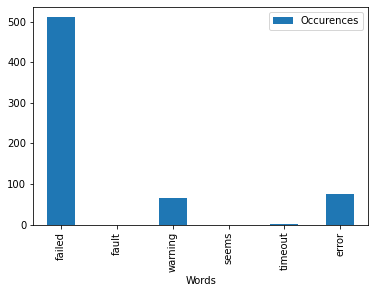

In [16]:
def occur(alist,final):
    out=[]
    final['New'] = final['Info'].str.replace('\W', ' ')
    for item in alist:
        final["a"]=final["New"].apply(lambda x: 1 if item.lower() in str(x).lower().split() else 0)
        sum=final["a"].sum()
        final=final.drop(columns=["a"])
        out.append(sum)
        print(sum)
    Data={"Words":alist , "Occurences": out}
    df = pd.DataFrame(Data,columns=['Words','Occurences'])
    df.plot(x ='Words', y='Occurences', kind = 'bar')   
occur(["failed","fault","warning","seems","timeout","error"],final)

763
2
2
9
18
2
187
162
3
6
0
60
0
0
14
13
0
12
28
1
0
22
0


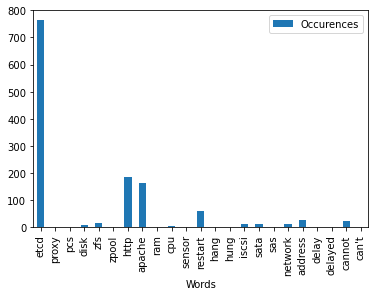

In [17]:
list_words=["etcd","proxy","pcs","disk","zfs","zpool","http","apache","ram","cpu","sensor","restart","hang","hung","iscsi","sata","sas","network","address","delay","delayed","cannot","can't"]
occur(list_words,final)

In [18]:
final=final.drop(columns=["a"])


In [19]:
from collections import Counter
final['New'] = final['Info'].str.replace('\W', ' ')
Counter(" ".join(final["New"]).split()).most_common(10)

[('pdhcp2712018702', 12590),
 ('dhcp31371', 10927),
 ('0', 9308),
 ('1', 8820),
 ('name', 7290),
 ('host', 7284),
 ('pool', 7107),
 ('ONLINE', 6907),
 ('sdc', 4729),
 ('status', 4549)]

In [20]:
final['New'] = final['Info'].str.replace('\W', ' ')

In [21]:
 pd.Series(' '.join(final['New']).lower().split()).value_counts()[:10]

pdhcp2712018702    12590
dhcp31371          10927
0                   9308
1                   8820
name                7848
host                7292
pool                7107
online              6908
sdc                 4729
status              4600
dtype: int64

In [27]:
def return_row(word):
    ind=[]
    for key, value in final["New"].iteritems():
        if word.lower() in value.lower().split():
            ind+=[key]
    return ind
return_row("failed")

510